# HandsOn ? - Regression
Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. Allright, without further ado let's get started!

## 💭 Load data from local disk

generate data (xn,yn)  with f(xn)+ϵn=yn where ϵn is i.i.d. noise from N(0,σ), xn is from [0,1] and f(x) = sin(2*π*x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def data(mu, sigma,number_of_samples):
    x = np.linspace(0, 1, number_of_samples)
    return x, np.sin(2 * np.pi * x) + np.random.normal(mu, sigma, number_of_samples)

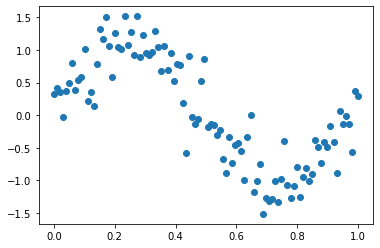

In [ ]:
x, y = data(0, 0.3,100)
plt.scatter(x, y)

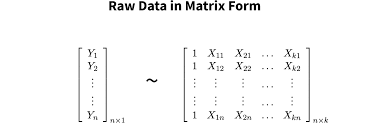

Now we need to design our feature matrix. A feature matrix is a matrix in which rows show each instance of our data and columns are features of that instance. We add a one to the begining of each row to incorporates a bias. To understand bias better, assum that you want to find f(x) = a*x + b, so in order to find different f with different b you need to have bias. Here each instance of our data has one feature wich is the x that point has and we need to add the bias.

In [ ]:
X = np.pad(x[:, np.newaxis], [(1, 0)], mode='constant')
X[:,0] = X[:,0] + 1
X = X[1:]

### Linear Regression

To keep it simple, we assume that f is a linear function of the form:
f(xn)=wTx, which w is a weight matrix. We can write that for our whole dataset: y=Xw+ϵ. By minimizing the sum of squared errors (SSE), we will learn the w. In order to minimize function L with respect to w, you need to calculate dL/dw = 0 as follows:

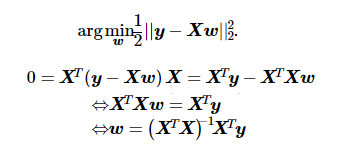

Now complete the following class to:


*   find w from X and y (fit the model to X and y)
*   predict y from input x using the learned w.
*   Use the predict function to plot the fitted model on previous scatter plot.



In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin


class LinearRegression(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return self

    def predict(self, X):
        return X.dot(self.w)

In [ ]:
model = LinearRegression().fit(X, y)

In [ ]:
testx = np.linspace(0, 1, 100)
testX = np.pad(testx[:, np.newaxis], [(1, 0)], mode='constant')
testX[:,0] = testX[:,0] + 1
testX = testX[1:]
testX

array([[1.        , 0.        ],
       [1.        , 0.01010101],
       [1.        , 0.02020202],
       [1.        , 0.03030303],
       [1.        , 0.04040404],
       [1.        , 0.05050505],
       [1.        , 0.06060606],
       [1.        , 0.07070707],
       [1.        , 0.08080808],
       [1.        , 0.09090909],
       [1.        , 0.1010101 ],
       [1.        , 0.11111111],
       [1.        , 0.12121212],
       [1.        , 0.13131313],
       [1.        , 0.14141414],
       [1.        , 0.15151515],
       [1.        , 0.16161616],
       [1.        , 0.17171717],
       [1.        , 0.18181818],
       [1.        , 0.19191919],
       [1.        , 0.2020202 ],
       [1.        , 0.21212121],
       [1.        , 0.22222222],
       [1.        , 0.23232323],
       [1.        , 0.24242424],
       [1.        , 0.25252525],
       [1.        , 0.26262626],
       [1.        , 0.27272727],
       [1.        , 0.28282828],
       [1.        , 0.29292929],
       [1.

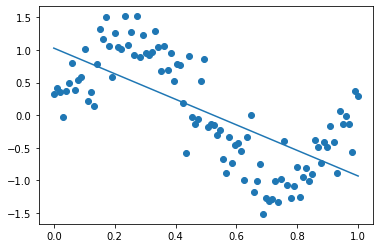

In [ ]:
plt.plot(testX[:,1],model.predict(testX))
plt.scatter(x,y)

As you can see, what we predicted above is not good enough to describe the relationship between X and y. Drawbacks of linear regression are its limite abilities(can only predict linear functions), and complexity of inverse which depends on features (O(D^3)). We can improve Linear Regression using methods we describe in following sections.

### Polynomial (Ridge) Regression

We can assume that the y is related to sum of powers of x. For instance the figure below shows that y is related to x and x^2. In order to find b0, b1 and b2 with Linear Regression we can assum that ouw features are non-linear. For example in the following example the feature vector is (1,x,x^2).

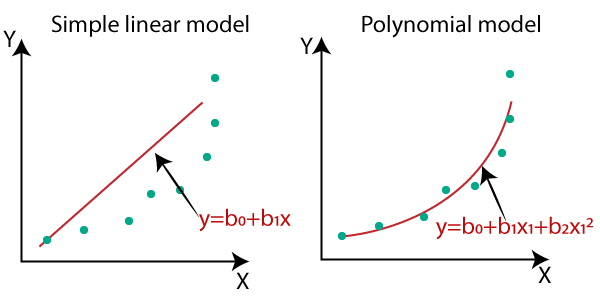



Now lets assume that the relationship between y and x are from a polynomial function with degree equal to 3.


*   Calculate the non-linear feature matrix.
*   Complete the Non-linear model. You can use PolynomialFeatures from sklearn.
*   Plot the model prediction for x.





In [ ]:
from sklearn.preprocessing import PolynomialFeatures


class PolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree):
        self.degree = degree

    def fit(self, X, y):
        self.poly = PolynomialFeatures(degree=self.degree).fit(X)
        X_poly = self.poly.transform(X)
        self.w = np.linalg.pinv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
        return self

    def predict(self, X):
        X_poly = self.poly.transform(X)
        return X_poly.dot(self.w)

In [ ]:
model = PolynomialRegression(3).fit(X, y)

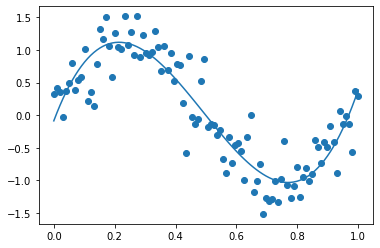

In [ ]:
plt.plot(testX[:,1],model.predict(testX))
plt.scatter(x,y)

A more complex form is that our features are (x1, x2), so, our non-linear features with degree of 3 are as follows.

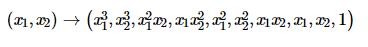

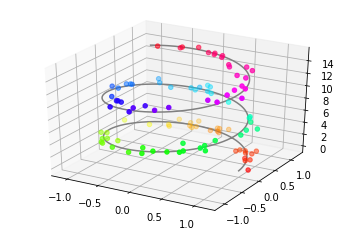

In [ ]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

In [ ]:
model = PolynomialRegression(30).fit(np.vstack((x_line,y_line)).T, z_line)

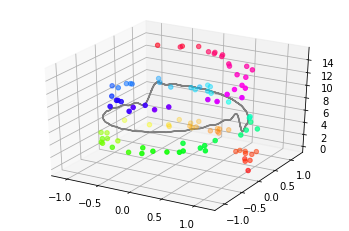

In [ ]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot3D(x_line, y_line, model.predict(np.vstack((x_line,y_line)).T), 'gray')
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
plt.show()

Problem we face using this method is that we made the complexity worser than before and we increased the number of features. We also might face overfitting.

#### Measuring the goodness of fit

Now we want to check how good our model is and how much of the data is explained by the model. We can use three metrics for evaluating our model, 1. R Square, 2. Mean Square Error(MSE), and 3. Mean Absolute Error(MAE). Define a function for each of the mentioned metrics using sklearn and calculate them for different degree.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = PolynomialRegression(3).fit(X, y)
import statsmodels.api as sm
result = sm.OLS(y, X).fit()
print(mean_squared_error(y, model.predict(testX)), mean_absolute_error(y, model.predict(testX)), result.rsquared)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.1075951977636985 0.25371996812602027 0.48429118596454346


### Overfitting and Underfitting

set degree of the model to 3, 6, 10, 20 and 70. Fit model on X and y and plot the prediction result on a plot as follows. What do you see?

[]

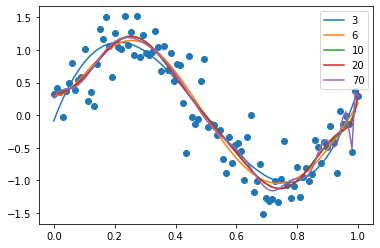

In [ ]:
testx = np.linspace(0, 1, 100)
testX = np.pad(testx[:, np.newaxis], [(1, 0)], mode='constant')
testX[:,0] = testX[:,0] + 1
testX = testX[1:]
for d in [3,6,10,20, 70]:
    model = PolynomialRegression(d).fit(X, y)
    plt.plot(testX[:,1],model.predict(testX), label = str(d))
plt.scatter(x,y)
plt.legend()
plt.plot()

The patter you have observed is the bias variance trade off.
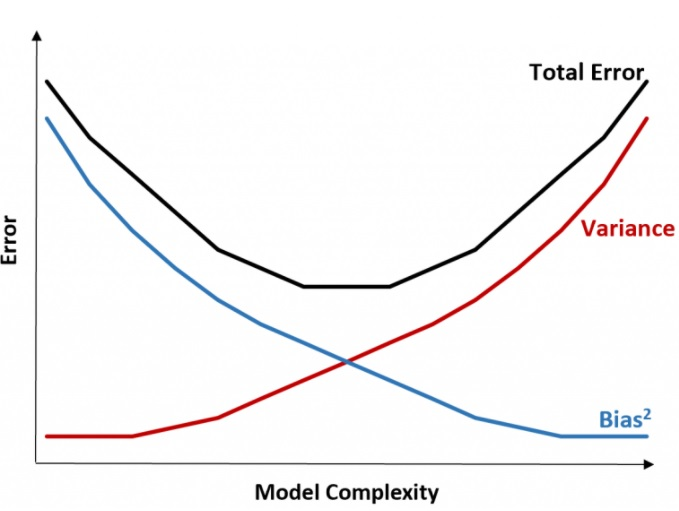
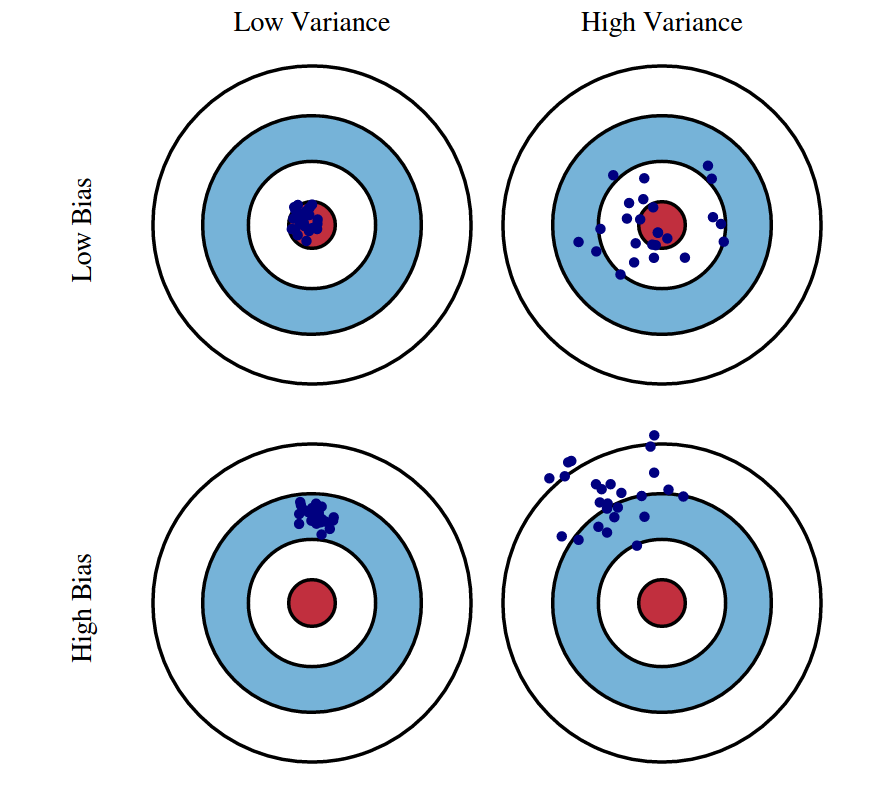